In [1]:
import pandas as pd
import numpy as np
import os

current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
print("Current Directory:", current_directory)
print("Parent Directory:", parent_directory)

import sys
sys.path.append(parent_directory)
#from libs.preprocessor import Organize_ADNI_data
from libs.utils import *

Current Directory: /Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/libs
Parent Directory: /Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach


# This is my sketchbook for codes.

In [2]:
df_AD = pd.read_csv("/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/All_AD_3loc_T1_axial_3_26_2024.csv")
df_AD


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I63214,133_S_1170,AD,M,74,m06,MRI,3-plane localizer,Original,7/30/2007,DCM,3/26/2024
1,I79451,127_S_0844,AD,F,86,m12,MRI,3-plane localizer,Original,10/26/2007,DCM,3/26/2024
2,I89328,027_S_1081,AD,M,86,m12,MRI,3-plane localizer,Original,2/04/2008,DCM,3/26/2024
3,I10143,098_S_0149,AD,M,88,sc,MRI,3-plane localizer,Original,1/22/2006,DCM,3/26/2024
4,I109876,136_S_0299,AD,F,91,m24,MRI,3-plane localizer,Original,6/13/2008,DCM,3/26/2024
...,...,...,...,...,...,...,...,...,...,...,...,...
213,I376312,052_S_5062,AD,F,71,v04,MRI,3-plane localizer,Original,6/12/2013,DCM,3/26/2024
214,I29375,133_S_1055,AD,M,85,sc,MRI,3-plane localizer,Original,11/13/2006,DCM,3/26/2024
215,I35964,131_S_0497,AD,M,76,m06,MRI,3-plane localizer,Original,1/10/2007,DCM,3/26/2024
216,I42342,007_S_1339,AD,F,80,sc,MRI,3-plane localizer,Original,2/22/2007,DCM,3/26/2024


In [5]:
def remove_duplicates(df):
    # Convert "Acq Date" column to datetime format
        df['Acq Date'] = pd.to_datetime(df['Acq Date'], format='%m/%d/%Y')
    
    # Sort by "Subject" and then by "Acq Date" in descending order
        df_sorted = df.sort_values(by=['Subject', 'Acq Date'], ascending=[True, False])
    
    # Drop duplicates based on "Subject" column, keep the first occurrence (latest date)
        new_df = df_sorted.drop_duplicates(subset='Subject', keep='first')
        return new_df

In [6]:
new_df_AD= remove_duplicates(df_AD)

In [7]:
new_df_AD

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
59,I116116,002_S_0619,AD,M,80,m24,MRI,3-plane localizer,Original,2008-08-13,DCM,3/26/2024
193,I88800,002_S_0816,AD,M,72,m12,MRI,3-plane localizer,Original,2008-01-28,DCM,3/26/2024
101,I124839,002_S_0938,AD,F,84,m24,MRI,3-plane localizer,Original,2008-10-31,DCM,3/26/2024
149,I54256,002_S_0955,AD,F,79,m06,MRI,3-plane localizer,Original,2007-05-10,DCM,3/26/2024
61,I130785,002_S_1018,AD,F,73,m24,MRI,3-plane localizer,Original,2008-12-12,DCM,3/26/2024
...,...,...,...,...,...,...,...,...,...,...,...,...
72,I109464,137_S_0366,AD,F,59,m24,MRI,3-plane localizer,Original,2008-06-12,DCM,3/26/2024
46,I14220,137_S_0438,AD,M,82,sc,MRI,3-plane localizer,Original,2006-04-27,DCM,3/26/2024
171,I136025,137_S_0796,AD,M,83,m24,MRI,3-plane localizer,Original,2009-02-12,DCM,3/26/2024
189,I51632,137_S_0841,AD,F,78,m06,MRI,3-plane localizer,Original,2007-04-26,DCM,3/26/2024


In [8]:
def get_filtrated_data_paths(data_folder, list_im_id):
        data_paths = []

        # Walk through the directory tree
        for root, dirs, files in os.walk(data_folder):
            for file in files:
                if file.endswith('.dcm'):  # Filter out files with .dcm extension
                    full_path = os.path.join(root, file)
                    data_paths.append(full_path)

        filtered_data_paths= [path for path in data_paths if any(path.endswith(suffix+".dcm") for suffix in list_im_id)]
        return filtered_data_paths

In [9]:
data_folder = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/raw/All_AD_3loc_T1_axial/ADNI"  # Update this with your actual AD_subjects' data folder path
data_paths = get_filtrated_data_paths(data_folder, new_df_AD["Image Data ID"].tolist())

data_paths

['/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/raw/All_AD_3loc_T1_axial/ADNI/027_S_1254/3-plane_localizer/2009-02-26_15_15_17.0/I137186/ADNI_027_S_1254_MR_3-plane_localizer__br_raw_20090227132857883_4_S63686_I137186.dcm',
 '/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/raw/All_AD_3loc_T1_axial/ADNI/027_S_1254/3-plane_localizer/2009-02-26_15_15_17.0/I137186/ADNI_027_S_1254_MR_3-plane_localizer__br_raw_20090227132858336_5_S63686_I137186.dcm',
 '/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/raw/All_AD_3loc_T1_axial/ADNI/027_S_1254/3-plane_localizer/2009-02-26_15_15_17.0/I137186/ADNI_027_S_1254_MR_3-plane_localizer__br_raw_20090227132857617_3_S63686_I137186.dcm',
 '/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/raw/All_AD_3loc_T1_axial/ADNI/027_S_1254/3-plane_localizer/2009-02-26_15_15_17.0/I137186/ADNI_027_S_1254_MR_3-plane_localizer__br_raw_20090227132856274_1_S63686_I137186.dc

In [10]:
import os
import shutil

def save_images_to_new_folder(data_paths, new_folder_path):
    # Ensure the new folder exists, create it if not
    if not os.path.exists(new_folder_path):
        os.makedirs(new_folder_path)
    
    # Iterate over each data path
    for data_path in data_paths:
        # Extract filename from the path
        filename = os.path.basename(data_path)
        
        # Copy the file to the new folder
        shutil.copy(data_path, os.path.join(new_folder_path, filename))
        print(f"Image '{filename}' saved to new folder.")

# Example usage:

new_folder_path = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/AD"

save_images_to_new_folder(data_paths, new_folder_path)


Image 'ADNI_027_S_1254_MR_3-plane_localizer__br_raw_20090227132857883_4_S63686_I137186.dcm' saved to new folder.
Image 'ADNI_027_S_1254_MR_3-plane_localizer__br_raw_20090227132858336_5_S63686_I137186.dcm' saved to new folder.
Image 'ADNI_027_S_1254_MR_3-plane_localizer__br_raw_20090227132857617_3_S63686_I137186.dcm' saved to new folder.
Image 'ADNI_027_S_1254_MR_3-plane_localizer__br_raw_20090227132856274_1_S63686_I137186.dcm' saved to new folder.
Image 'ADNI_027_S_1254_MR_3-plane_localizer__br_raw_20090227132857320_2_S63686_I137186.dcm' saved to new folder.
Image 'ADNI_094_S_1102_MR_3-plane_localizer__br_raw_20070622170553034_1_S33945_I57613.dcm' saved to new folder.
Image 'ADNI_094_S_1102_MR_3-plane_localizer__br_raw_20070622170554286_2_S33945_I57613.dcm' saved to new folder.
Image 'ADNI_094_S_1102_MR_3-plane_localizer__br_raw_20070622170555428_5_S33945_I57613.dcm' saved to new folder.
Image 'ADNI_094_S_1102_MR_3-plane_localizer__br_raw_20070622170554596_3_S33945_I57613.dcm' saved to

Patient Name: 002_S_0619
Patient ID: 002_S_0619
Study Description: MRI BRAIN W/O CONTRAST


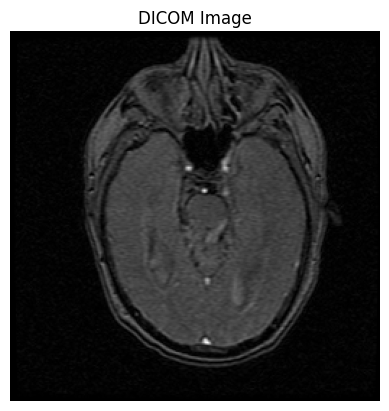

In [11]:
import pydicom
import matplotlib.pyplot as plt

# Specify the path to your DICOM file
dcm_file_path = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/AD/ADNI_002_S_0619_MR_3-plane_localizer__br_raw_20080813225809528_1_S55371_I116116.dcm"

# Read the DICOM file
ds = pydicom.dcmread(dcm_file_path)

# Now you can access DICOM metadata and pixel data
# For example:
print("Patient Name:", ds.PatientName)
print("Patient ID:", ds.PatientID)
print("Study Description:", ds.StudyDescription)

# Access pixel data
pixel_data = ds.pixel_array

# Plot the image
plt.imshow(pixel_data, cmap='gray')
plt.title("DICOM Image")
plt.axis('off')  # Turn off axis labels
plt.show()

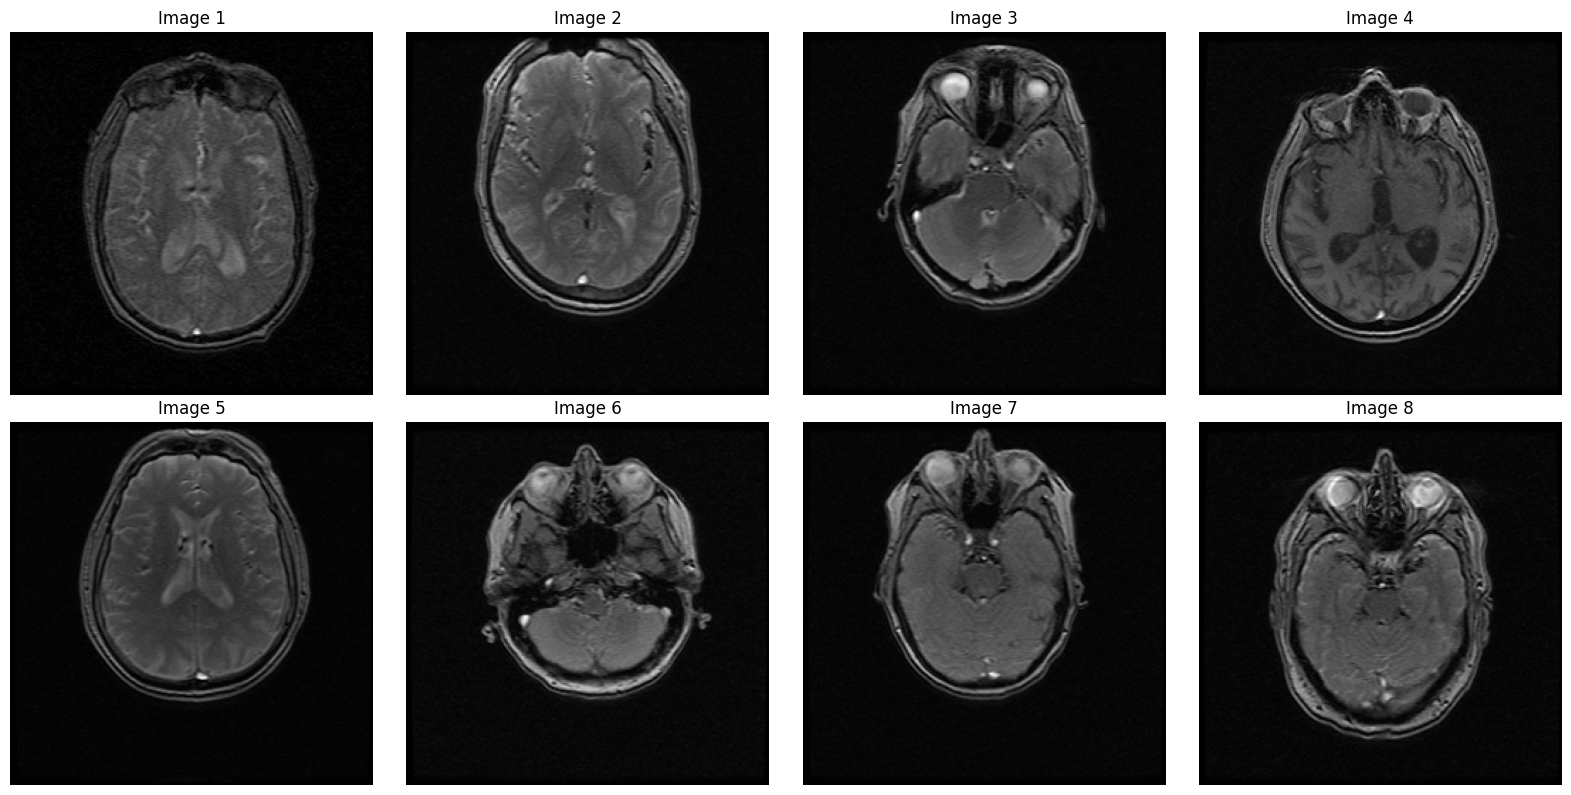

In [12]:
import matplotlib.pyplot as plt
import pydicom
import os

def plot_8_images(image_paths):
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))

    for i, image_path in enumerate(image_paths):
        row = i // 4
        col = i % 4

        # Read the DICOM image
        ds = pydicom.dcmread(image_path)
        image = ds.pixel_array

        # Plot the image
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].axis('off')
        axes[row, col].set_title(f"Image {i+1}")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # List of paths to 8 different DICOM images
    image_paths = [
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/AD/ADNI_002_S_0619_MR_3-plane_localizer__br_raw_20080813225810626_4_S55371_I116116.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/AD/ADNI_002_S_0816_MR_3-plane_localizer__br_raw_20080128222155928_4_S45028_I88800.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/AD/ADNI_002_S_1018_MR_3-plane_localizer__br_raw_20081212200156638_3_S60830_I130785.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/AD/ADNI_014_S_0356_MR_3-plane_localizer__br_raw_20060406121348075_3_S12854_I12999.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/CN/ADNI_002_S_0559_MR_3-plane_localizer__br_raw_20090701011232829_4_S69296_I147109.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/CN/ADNI_002_S_1261_MR_3-plane_localizer__br_raw_20100225171333357_2_S80479_I166840.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/MCI/ADNI_002_S_0954_MR_3-plane_localizer__br_raw_20080605221019804_2_S51090_I108595.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/MCI/ADNI_007_S_0344_MR_3-plane_localizer__br_raw_20100617151743331_4_S87402_I179130.dcm"
    ]

    # Check if all image paths exist
    missing_paths = [path for path in image_paths if not os.path.exists(path)]
    if missing_paths:
        print("Error: Some image paths do not exist:")
        for path in missing_paths:
            print(path)
    else:
        # Plot the images
        plot_8_images(image_paths)

Cropped DICOM file saved successfully: data-ADNI/resized/cropped_dicom_file.dcm


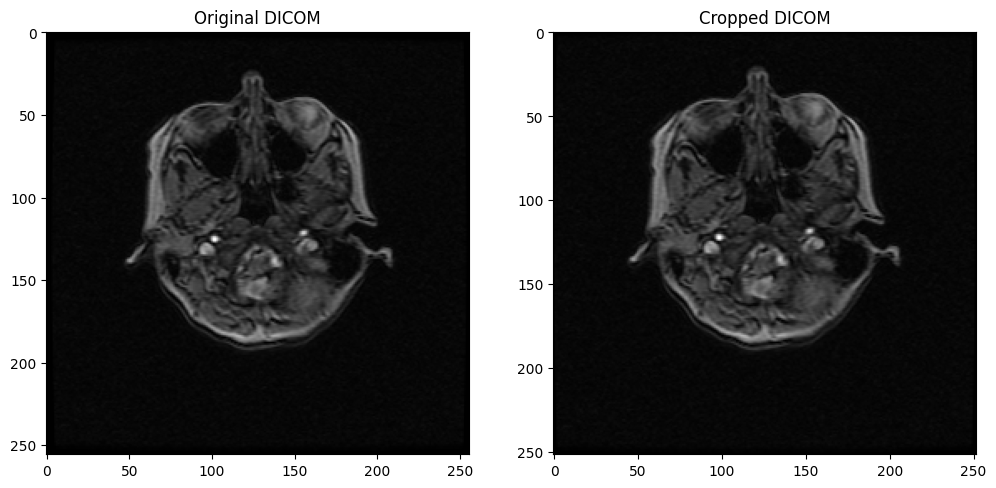

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom

def crop_black_frame(image_array):
    # Find the coordinates of non-zero elements (i.e., not black)
    non_black_pixels = np.argwhere(image_array > 0)
    
    # Get the bounding box of non-black pixels
    top_left = non_black_pixels.min(axis=0)
    bottom_right = non_black_pixels.max(axis=0)
    
    # Crop the image using the bounding box
    cropped_image = image_array[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]
    
    return cropped_image

# Load DICOM image
dicom_file = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/MCI/ADNI_002_S_0729_MR_3-plane_localizer__br_raw_20100722173733613_3_S89461_I186075.dcm"
dicom_data = pydicom.dcmread(dicom_file)

# Extract image data from DICOM file
image_array = dicom_data.pixel_array

# Crop black frame
cropped_image = crop_black_frame(image_array)

# Create resized folder if it doesn't exist
output_folder = "data-ADNI/resized"
os.makedirs(output_folder, exist_ok=True)

# Update DICOM dataset with cropped image data
dicom_data.PixelData = cropped_image.tobytes()
dicom_data.Rows, dicom_data.Columns = cropped_image.shape

# Save cropped DICOM to a new file under resized folder
output_path = os.path.join(output_folder, "cropped_dicom_file.dcm")
dicom_data.save_as(output_path)

print("Cropped DICOM file saved successfully:", output_path)

# Plot original and cropped images side by side
plt.figure(figsize=(12, 6))

# Original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original DICOM')

# Cropped DICOM image
cropped_dicom_data = pydicom.dcmread(output_path)
cropped_image_array = cropped_dicom_data.pixel_array
plt.subplot(1, 2, 2)
plt.imshow(cropped_image_array, cmap='gray')
plt.title('Cropped DICOM')

plt.show()


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import cv2

def crop_black_frame(image_array):
    # Threshold the image to get binary mask
    _, thresh = cv2.threshold(image_array, 1, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get bounding box of largest contour
    x, y, w, h = cv2.boundingRect(contours[0])
    
    # Crop the image using the bounding box
    cropped_image = image_array[y:y+h, x:x+w]
    
    return cropped_image

# Load DICOM image
dicom_file = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/MCI/ADNI_002_S_0729_MR_3-plane_localizer__br_raw_20100722173733613_3_S89461_I186075.dcm"
dicom_data = pydicom.dcmread(dicom_file)

# Extract image data from DICOM file
image_array = dicom_data.pixel_array

# Crop black frame
cropped_image = crop_black_frame(image_array)

# Create resized folder if it doesn't exist
output_folder = "data-ADNI/resized"
os.makedirs(output_folder, exist_ok=True)

# Update DICOM dataset with cropped image data
dicom_data.PixelData = cropped_image.tobytes()
dicom_data.Rows, dicom_data.Columns = cropped_image.shape

# Save cropped DICOM to a new file under resized folder
output_path = os.path.join(output_folder, "cropped_dicom_file.dcm")
dicom_data.save_as(output_path)

# Plot original and cropped images side by side
plt.figure(figsize=(12, 6))

# Original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original DICOM')

# Cropped DICOM image
cropped_dicom_data = pydicom.dcmread(output_path)
cropped_image_array = cropped_dicom_data.pixel_array
plt.subplot(1, 2, 2)
plt.imshow(cropped_image_array, cmap='gray')
plt.title('Cropped DICOM')

plt.show()


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/contours.cpp:194: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


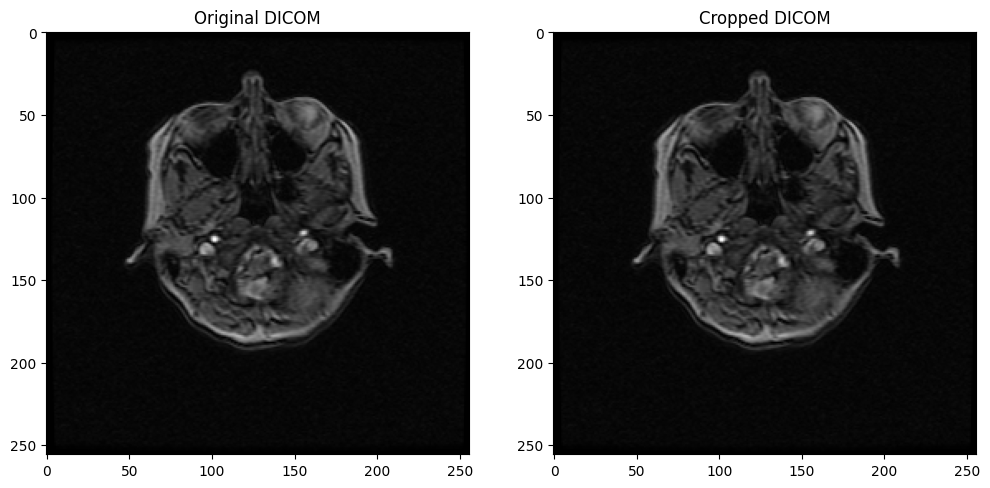

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import cv2

def crop_black_frame(image_array):
    # Convert to uint8 format for OpenCV compatibility
    image_uint8 = np.uint8(image_array)
    
    # Invert the image (black becomes white and vice versa)
    inverted_image = cv2.bitwise_not(image_uint8)
    
    # Threshold the image to get binary mask
    _, thresh = cv2.threshold(inverted_image, 1, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get bounding box of largest contour
    x, y, w, h = cv2.boundingRect(contours[0])
    
    # Crop the image using the bounding box
    cropped_image = image_array[y:y+h, x:x+w]
    
    return cropped_image

# Load DICOM image
dicom_file ="/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/MCI/ADNI_002_S_0729_MR_3-plane_localizer__br_raw_20100722173733613_3_S89461_I186075.dcm"
dicom_data = pydicom.dcmread(dicom_file)

# Extract image data from DICOM file
image_array = dicom_data.pixel_array

# Crop black frame
cropped_image = crop_black_frame(image_array)

# Create resized folder if it doesn't exist
output_folder = "resized"
os.makedirs(output_folder, exist_ok=True)

# Update DICOM dataset with cropped image data
dicom_data.PixelData = cropped_image.tobytes()
dicom_data.Rows, dicom_data.Columns = cropped_image.shape

# Save cropped DICOM to a new file under resized folder
output_path = os.path.join(output_folder, "cropped_dicom_file.dcm")
dicom_data.save_as(output_path)

# Plot original and cropped images side by side
plt.figure(figsize=(12, 6))

# Original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original DICOM')

# Cropped DICOM image
cropped_dicom_data = pydicom.dcmread(output_path)
cropped_image_array = cropped_dicom_data.pixel_array
plt.subplot(1, 2, 2)
plt.imshow(cropped_image_array, cmap='gray')
plt.title('Cropped DICOM')

plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import cv2

def crop_black_frame(image_array):
    # Convert to uint8 format for OpenCV compatibility
    image_uint8 = np.uint8(image_array)
    
    # Invert the image (black becomes white and vice versa)
    inverted_image = cv2.bitwise_not(image_uint8)
    
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(inverted_image, (5, 5), 0)
    
    # Adaptive thresholding to binarize the image
    _, thresh = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get bounding box of largest contour
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    
    # Crop the image using the bounding box
    cropped_image = image_array[y:y+h, x:x+w]
    
    return cropped_image

# Load DICOM image
dicom_file = "your_dicom_file.dcm"
dicom_data = pydicom.dcmread(dicom_file)

# Extract image data from DICOM file
image_array = dicom_data.pixel_array

# Crop black frame
cropped_image = crop_black_frame(image_array)

# Create resized folder if it doesn't exist
output_folder = "resized"
os.makedirs(output_folder, exist_ok=True)

# Update DICOM dataset with cropped image data
dicom_data.PixelData = cropped_image.tobytes()
dicom_data.Rows, dicom_data.Columns = cropped_image.shape

# Save cropped DICOM to a new file under resized folder
output_path = os.path.join(output_folder, "cropped_dicom_file.dcm")
dicom_data.save_as(output_path)

# Plot original and cropped images side by side
plt.figure(figsize=(12, 6))

# Original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original DICOM')

# Cropped DICOM image
cropped_dicom_data = pydicom.dcmread(output_path)
cropped_image_array = cropped_dicom_data.pixel_array
plt.subplot(1, 2, 2)
plt.imshow(cropped_image_array, cmap='gray')
plt.title('Cropped DICOM')

plt.show()


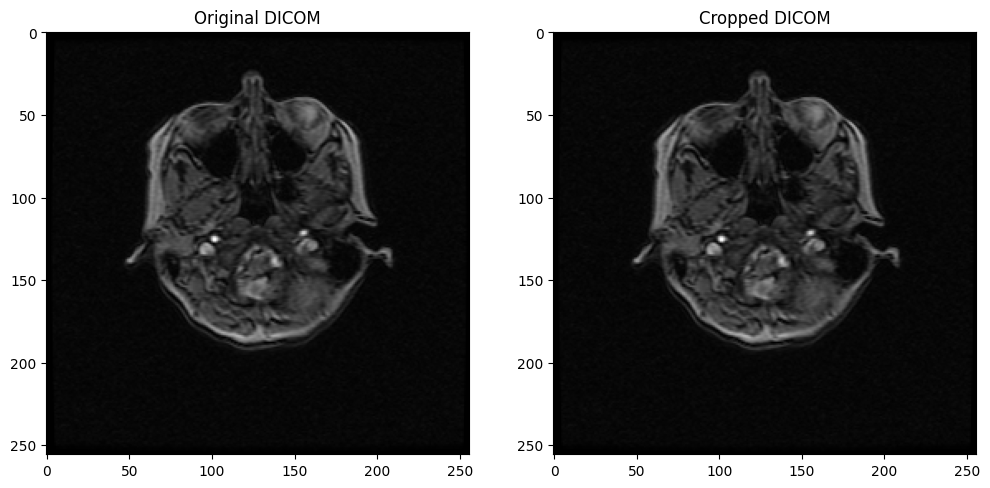

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import cv2

def crop_black_frame(image_array):
    # Convert to uint8 format for OpenCV compatibility
    image_uint8 = np.uint8(image_array)
    
    # Invert the image (black becomes white and vice versa)
    inverted_image = cv2.bitwise_not(image_uint8)
    
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(inverted_image, (5, 5), 0)
    
    # Adaptive thresholding to binarize the image
    _, thresh = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get bounding box of largest contour
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    
    # Crop the image using the bounding box
    cropped_image = image_array[y:y+h, x:x+w]
    
    return cropped_image

# Load DICOM image
dicom_file = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/MCI/ADNI_002_S_0729_MR_3-plane_localizer__br_raw_20100722173733613_3_S89461_I186075.dcm"
dicom_data = pydicom.dcmread(dicom_file)

# Extract image data from DICOM file
image_array = dicom_data.pixel_array

# Crop black frame
cropped_image = crop_black_frame(image_array)

# Create resized folder if it doesn't exist
output_folder = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/resized"
os.makedirs(output_folder, exist_ok=True)

# Update DICOM dataset with cropped image data
dicom_data.PixelData = cropped_image.tobytes()
dicom_data.Rows, dicom_data.Columns = cropped_image.shape

# Save cropped DICOM to a new file under resized folder
output_path = os.path.join(output_folder, "cropped_dicom_file.dcm")
dicom_data.save_as(output_path)

# Plot original and cropped images side by side
plt.figure(figsize=(12, 6))

# Original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original DICOM')

# Cropped DICOM image
cropped_dicom_data = pydicom.dcmread(output_path)
cropped_image_array = cropped_dicom_data.pixel_array
plt.subplot(1, 2, 2)
plt.imshow(cropped_image_array, cmap='gray')
plt.title('Cropped DICOM')

plt.show()


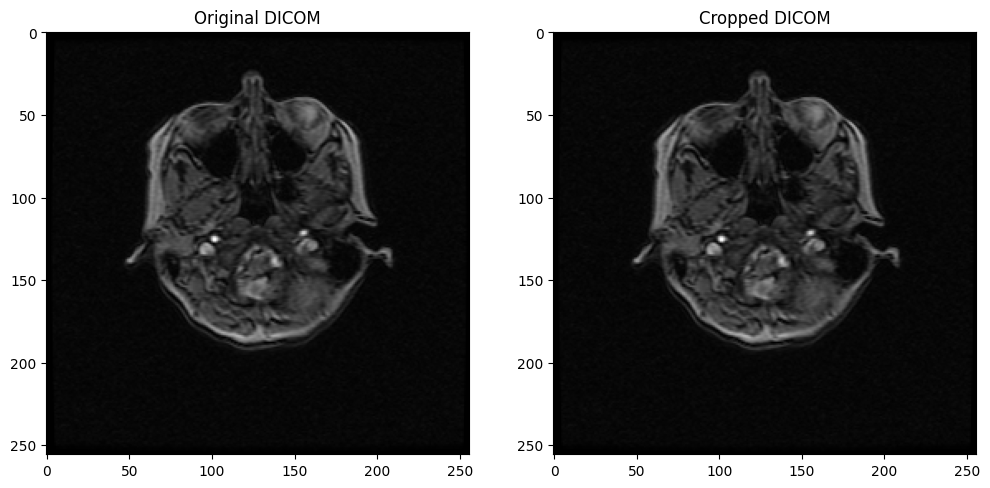

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import cv2

def crop_black_frame(image_array):
    # Convert to uint8 format for OpenCV compatibility
    image_uint8 = (image_array / np.max(image_array) * 255).astype(np.uint8)
    
    # Invert the image (black becomes white and vice versa)
    inverted_image = cv2.bitwise_not(image_uint8)
    
    # Convert to grayscale
    if len(inverted_image.shape) > 2:
        grayscale_image = cv2.cvtColor(inverted_image, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_image = inverted_image
    
    # Find contours
    contours, _ = cv2.findContours(grayscale_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if any contour is found
    if len(contours) == 0:
        raise ValueError("No contour found. Unable to crop.")
    
    # Get the largest contour
    max_contour = max(contours, key=cv2.contourArea)
    
    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(max_contour)
    
    # Crop the image using the bounding box
    cropped_image = image_array[y:y+h, x:x+w]
    
    return cropped_image


# Load DICOM image
dicom_file = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/MCI/ADNI_002_S_0729_MR_3-plane_localizer__br_raw_20100722173733613_3_S89461_I186075.dcm"
dicom_data = pydicom.dcmread(dicom_file)

# Extract image data from DICOM file
image_array = dicom_data.pixel_array

# Crop black frame
cropped_image = crop_black_frame(image_array)

# Create resized folder if it doesn't exist
output_folder = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/resized"
os.makedirs(output_folder, exist_ok=True)

# Update DICOM dataset with cropped image data
dicom_data.PixelData = cropped_image.tobytes()
dicom_data.Rows, dicom_data.Columns = cropped_image.shape

# Save cropped DICOM to a new file under resized folder
output_path = os.path.join(output_folder, "cropped_dicom_file.dcm")
dicom_data.save_as(output_path)

# Plot original and cropped images side by side
plt.figure(figsize=(12, 6))

# Original DICOM image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original DICOM')

# Cropped DICOM image
cropped_dicom_data = pydicom.dcmread(output_path)
cropped_image_array = cropped_dicom_data.pixel_array
plt.subplot(1, 2, 2)
plt.imshow(cropped_image_array, cmap='gray')
plt.title('Cropped DICOM')

plt.show()


In [14]:
import os
import pydicom
from PIL import Image
import numpy as np
import cv2

def crop_black_frame(image_array):
    # Convert to uint8 format for OpenCV compatibility
    image_uint8 = (image_array / np.max(image_array) * 255).astype(np.uint8)
    
    # Invert the image (black becomes white and vice versa)
    inverted_image = cv2.bitwise_not(image_uint8)
    
    # Convert to grayscale
    if len(inverted_image.shape) > 2:
        grayscale_image = cv2.cvtColor(inverted_image, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_image = inverted_image
    
    # Find contours
    contours, _ = cv2.findContours(grayscale_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if any contour is found
    if len(contours) == 0:
        raise ValueError("No contour found. Unable to crop.")
    
    # Get the largest contour
    max_contour = max(contours, key=cv2.contourArea)
    
    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(max_contour)
    
    # Crop the image using the bounding box
    cropped_image = image_array[y:y+h, x:x+w]
    
    return cropped_image

def convert_dicom_to_jpg_with_cropping(dicom_path, jpg_path):
    # Load DICOM file
    dicom_data = pydicom.dcmread(dicom_path)
    
    # Get pixel array
    pixel_array = dicom_data.pixel_array
    
    try:
        # Crop black frame
        cropped_image = crop_black_frame(pixel_array)
        
        # Normalize pixel values to 0-255 range
        cropped_image = (cropped_image / cropped_image.max()) * 255
        
        # Convert pixel array to uint8
        cropped_image = cropped_image.astype('uint8')
        
        # Create PIL image
        image = Image.fromarray(cropped_image)
        
        # Save as JPEG
        image.save(jpg_path)
        
        print("Conversion successful!")
    except ValueError as e:
        print("Error during cropping:", e)

# Example usage
dicom_file = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/MCI/ADNI_002_S_0729_MR_3-plane_localizer__br_raw_20100722173733613_3_S89461_I186075.dcm"
jpg_file = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/resized"

convert_dicom_to_jpg_with_cropping(dicom_file, jpg_file)


Error during cropping: unknown file extension: 


In [ ]:
import os
import pydicom
import numpy as np
import cv2

class DICOMPreprocessor:
    def __init__(self, target_size=(120, 120)):
        self.target_size = target_size

    def crop_black_frame(self, image_data):
        if image_data is None:
            print("Failed to read DICOM image.")
            return None

        # Threshold to create a binary image
        _, thresh = cv2.threshold(image_data, 20, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(thresh.astype(np.uint8), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        if not contours:
            print("No contours found in DICOM image.")
            return image_data

        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Crop the image
        cropped_image = image_data[y:y+h, x:x+w]
        return cropped_image

    def process_image(self, image_path):
        # Read the DICOM file
        image = pydicom.dcmread(image_path)

        # Convert DICOM pixel data to numpy array
        image_data = image.pixel_array

        # Crop black frames
        cropped_image = self.crop_black_frame(image_data)

        if cropped_image is not None:
            # Resize the image
            resized_image = cv2.resize(cropped_image, self.target_size, interpolation=cv2.INTER_AREA)
            return resized_image
        return None

    def process_dataset(self, input_directory, output_directory):
        # Create the output directory if it doesn't exist
        os.makedirs(output_directory, exist_ok=True)

        # Process each DICOM file in the input directory
        for file_name in os.listdir(input_directory):
            if file_name.lower().endswith('.dcm'):
                input_path = os.path.join(input_directory, file_name)
                output_path = os.path.join(output_directory, file_name.replace('.dcm', '_resized.dcm'))

                # Process the image and save the result
                processed_image = self.process_image(input_path)
                if processed_image is not None:
                    self.save_processed_dicom(processed_image, input_path, output_path)
                else:
                    print(f"Failed to process image: {input_path}")

    def save_processed_dicom(self, image_data, input_path, output_path):
        # Read metadata from the original DICOM file
        original_ds = pydicom.dcmread(input_path)

        # Create a new DICOM dataset
        new_ds = pydicom.Dataset()
        new_ds.PixelData = image_data.tobytes()
        new_ds.Rows, new_ds.Columns = image_data.shape
        new_ds.PatientID = original_ds.PatientID  # Copy patient ID, modify as needed

        # Write the new DICOM dataset to a file
        new_ds.save_as(output_path)


if __name__ == '__main__':
    INPUT_DIRECTORY = '/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim'
    OUTPUT_DIRECTORY = '/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/resized'

    preprocessor = DICOMPreprocessor()
    preprocessor.process_dataset(INPUT_DIRECTORY, OUTPUT_DIRECTORY)


In [19]:
import pydicom
import os
import numpy as np
import cv2

dicom_folder = '/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/raw/All_AD_3loc_T1_axial/ADNI/002_S_0619' # Set the folder of your dicom files that inclued images 
jpg_folder = 'trial_folder' # Set the folder of your output folder for jpg files 
# Step 1. prepare your input(.dcm) and output(.jpg) filepath 
dcm_jpg_map = {}
for dicom_f in os.listdir(dicom_folder):
    dicom_filepath = os.path.join(dicom_folder, dicom_f)
    jpg_f = dicom_f.replace('.dcm', '.jpg') 
    jpg_filepath = os.path.join(jpg_folder,jpg_f)
    dcm_jpg_map[dicom_filepath] = jpg_filepath

# Now, dcm_jpg_map is key,value pair of input dcm filepath and output jpg filepath

# Step 2. process your image by input/output information
unstacked_list = []
for dicom_filepath, jpg_filepath in dcm_jpg_map.items():
    # convert dicom file into jpg file
    dicom = pydicom.read_file(dicom_filepath, force= True)
    np_pixel_array = dicom.pixel_array
    unstacked_list.append(np_pixel_array)
    cv2.imwrite(jpg_filepath, np_pixel_array)
final_array = np.array(unstacked_list)

AttributeError: 'FileMetaDataset' object has no attribute 'TransferSyntaxUID'

In [20]:
import os
import numpy as np
import pydicom
import cv2

def crop_black_frame(dicom_path):
    # Read DICOM file
    dicom_data = pydicom.dcmread(dicom_path)
    
    # Extract pixel data
    image_array = dicom_data.pixel_array
    
    # Convert to uint8 format for OpenCV compatibility
    image_uint8 = (image_array / np.max(image_array) * 255).astype(np.uint8)
    
    # Invert the image (black becomes white and vice versa)
    inverted_image = cv2.bitwise_not(image_uint8)
    
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(inverted_image, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding
    _, binary_image = cv2.threshold(grayscale_image, 20, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if any contour is found
    if len(contours) == 0:
        raise ValueError("No black frame found.")
    
    # Get the bounding box of the largest contour (assumed to be the black frame)
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    
    # Crop the image using the bounding box
    cropped_image = image_array[y:y+h, x:x+w]
    
    return cropped_image

# Example usage
dicom_file = "../data-ADNI/raw/All_AD_3loc_T1_axial/ADNI/002_S_0619/3-plane_localizer/2008-08-13_15_18_48.0/I116116/ADNI_002_S_0619_MR_3-plane_localizer__br_raw_20080813225809528_1_S55371_I116116.dcm"  # Replace with your DICOM file path
output_file = "cropped_image.dcm"  # Path to save the cropped DICOM image

try:
    cropped_image = crop_black_frame(dicom_file)
    
    # Save cropped image as a new DICOM file
    dicom_data = pydicom.dcmread(dicom_file)
    dicom_data.PixelData = cropped_image.tobytes()
    dicom_data.Rows, dicom_data.Columns = cropped_image.shape
    dicom_data.save_as(output_file)
    
    print("Cropped image saved as:", output_file)
except ValueError as e:
    print("Error:", e)


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [31]:
# This code is working. DO NOT CHANGE OR DELETE THIS.
import os
import numpy as np
import pydicom
import cv2

def crop_black_frame(dicom_path):
    # Read DICOM file
    dicom_data = pydicom.dcmread(dicom_path)
    
    # Extract pixel data
    image_array = dicom_data.pixel_array
    
    # Convert to uint8 format for OpenCV compatibility
    image_uint8 = (image_array / np.max(image_array) * 255).astype(np.uint8)
    
    # Apply adaptive thresholding
    _, binary_image = cv2.threshold(image_uint8, 20, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if any contour is found
    if len(contours) == 0:
        raise ValueError("No black frame found.")
    
    # Get the bounding box of the largest contour (assumed to be the black frame)
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    
    # Crop the image using the bounding box
    cropped_image = image_array[y:y+h, x:x+w]
    
    return cropped_image

# Example usage
dicom_file = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/raw/All_AD_3loc_T1_axial/ADNI/002_S_0619/3-plane_localizer/2008-08-13_15_18_48.0/I116116/ADNI_002_S_0619_MR_3-plane_localizer__br_raw_20080813225809528_1_S55371_I116116.dcm"  # Replace with your DICOM file path
output_file = "cropped_image.dcm"  # Path to save the cropped DICOM image

try:
    cropped_image = crop_black_frame(dicom_file)
    
    # Save cropped image as a new DICOM file
    dicom_data = pydicom.dcmread(dicom_file)
    dicom_data.PixelData = cropped_image.tobytes()
    dicom_data.Rows, dicom_data.Columns = cropped_image.shape
    dicom_data.save_as(output_file)
    
    print("Cropped image saved as:", output_file)
except ValueError as e:
    print("Error:", e)




Cropped image saved as: cropped_image3.dcm


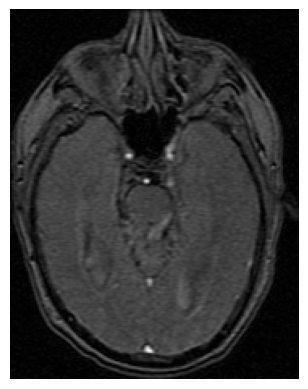

In [23]:
import pydicom

# Path to the DICOM file
dicom_file_path = "cropped_image.dcm"

# Read the DICOM file
dicom_data = pydicom.dcmread(dicom_file_path)

# Extract pixel data from the DICOM file
pixel_array = dicom_data.pixel_array

# Now you can work with the pixel array, for example, display it using matplotlib
import matplotlib.pyplot as plt

plt.imshow(pixel_array, cmap='gray')
plt.axis('off')
plt.show()


In [35]:
# TODO:COME BACK AND CONTINUE HERE.

# This code is working. DO NOT CHANGE OR DELETE THIS.
import os
import numpy as np
import pydicom
import cv2

def crop_black_frame(dicom_path):
    # Read DICOM file
    dicom_data = pydicom.dcmread(dicom_path)
    
    # Extract pixel data
    image_array = dicom_data.pixel_array
    
    # Convert to uint8 format for OpenCV compatibility
    image_uint8 = (image_array / np.max(image_array) * 255).astype(np.uint8)
    
    # Apply adaptive thresholding
    _, binary_image = cv2.threshold(image_uint8, 20, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if any contour is found
    if len(contours) == 0:
        raise ValueError("No black frame found.")
    
    # Get the bounding box of the largest contour (assumed to be the black frame)
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    
    # Crop the image using the bounding box
    cropped_image = image_array[y:y+h, x:x+w]
    
    return cropped_image

# Example usage
dicom_file = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/raw/All_AD_3loc_T1_axial/ADNI/002_S_0619/3-plane_localizer/2008-08-13_15_18_48.0/I116116/ADNI_002_S_0619_MR_3-plane_localizer__br_raw_20080813225809528_1_S55371_I116116.dcm"  # Replace with your DICOM file path
output_file = "cropped_image3.dcm"  

try:
    cropped_image = crop_black_frame(dicom_file)
    
    # Save cropped image as a new DICOM file
    dicom_data = pydicom.dcmread(dicom_file)
    dicom_data.PixelData = cropped_image.tobytes()
    dicom_data.Rows, dicom_data.Columns = cropped_image.shape
    dicom_data.save_as("../data-ADNI/resized/"+output_file)
    
    print("Cropped image saved as:", output_file)
except ValueError as e:
    print("Error:", e)

Cropped image saved as: cropped_image3.dcm


In [16]:
def crop_black_frame(dicom_path):
    # Read DICOM file
    dicom_data = pydicom.dcmread(dicom_path)
    
    # Extract pixel data
    image_array = dicom_data.pixel_array
    
    # Convert to uint8 format for OpenCV compatibility
    image_uint8 = (image_array / np.max(image_array) * 255).astype(np.uint8)
    
    # Apply adaptive thresholding
    _, binary_image = cv2.threshold(image_uint8, 20, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if any contour is found
    if len(contours) == 0:
        raise ValueError("No black frame found.")
    
    # Get the bounding box of the largest contour (assumed to be the black frame)
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    
    # Crop the image using the bounding box
    cropped_image = image_array[y:y+h, x:x+w]
    
    return cropped_image

In [17]:
crop_black_frame()

# Example usage
dicom_file = "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/raw/All_AD_3loc_T1_axial/ADNI/002_S_0619/3-plane_localizer/2008-08-13_15_18_48.0/I116116/ADNI_002_S_0619_MR_3-plane_localizer__br_raw_20080813225809528_1_S55371_I116116.dcm"  # Replace with your DICOM file path
output_file = "cropped_image2.dcm"  # Path to save the cropped DICOM image

try:
    cropped_image = crop_black_frame(dicom_file)
    
    # Save cropped image as a new DICOM file
    dicom_data = pydicom.dcmread(dicom_file)
    dicom_data.PixelData = cropped_image.tobytes()
    dicom_data.Rows, dicom_data.Columns = cropped_image.shape
    dicom_data.save_as(output_file)
    
    print("Cropped image saved as:", output_file)
except ValueError as e:
    print("Error:", e)

TypeError: crop_black_frame() missing 1 required positional argument: 'dicom_path'

In [14]:
import pydicom
def save_cropped_files(dicom_file):

    cropped_image = crop_black_frame(dicom_file)
    # Save cropped image as a new DICOM file
    dicom_data = pydicom.dcmread(dicom_file)
    dicom_data.PixelData = cropped_image.tobytes()
    dicom_data.Rows, dicom_data.Columns = cropped_image.shape
    output_file = "data-ADNI/resized/"
    dicom_data.save_as(output_file)

In [15]:
save_cropped_files("../data-ADNI/raw/All_AD_3loc_T1_axial/ADNI/002_S_0619")

IsADirectoryError: [Errno 21] Is a directory: '../data-ADNI/raw/All_AD_3loc_T1_axial/ADNI/002_S_0619'